<a href="https://colab.research.google.com/github/dolly1712/cardiovascular-health-disease-pred/blob/main/Cardiovascular_health_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**



*   Heart disease is a leading cause of death worldwide, with millions of people succumbing to it each year.

*   Although heart disease cannot be cured, predicting the risk of developing it can help prevent severe symptoms and even save lives.

*   This project aims to create a model that can accurately predict whether a person is at risk of developing heart disease over a 10-year period
*    By analyzing factors such as age, lifestyle choices, and medical history, we hope to identify individuals who may need closer monitoring or preventative measures to safeguard their heart health.






**Attribute Information**


*   Sex: male or female("M" or "F")

*   Age: Age of the patient
*    is_smoking: whether or not the patient is a current smoker ("YES" or "NO")


*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day



*   BP Meds: whether or not the patient was on blood pressure medication

*   Prevalent Stroke: whether or not the patient had previously had a stroke

*   Prevalent Hyp: whether or not the patient was hypertensive

*   Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

*   Tot Chol: total cholesterol level

*   Sys BP: systolic blood pressure

*   Dia BP: diastolic blood pressure
*   BMI: Body Mass Index


*   Heart Rate: heart rate


*   Glucose: glucose level


*   CHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)







**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

**Loading the data**

In [ ]:
chd_df = pd.read_csv("/content/data_cardiovascular_risk.csv")

In [ ]:
df = chd_df.copy()

In [ ]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe().T

count         mean         std     min     25%      50%  \
id               3390.0  1694.500000  978.753033    0.00  847.25  1694.50   
age              3390.0    49.542183    8.592878   32.00   42.00    49.00   
education        3303.0     1.970936    1.019081    1.00    1.00     2.00   
cigsPerDay       3368.0     9.069477   11.879078    0.00    0.00     0.00   
BPMeds           3346.0     0.029886    0.170299    0.00    0.00     0.00   
prevalentStroke  3390.0     0.006490    0.080309    0.00    0.00     0.00   
prevalentHyp     3390.0     0.315339    0.464719    0.00    0.00     0.00   
diabetes         3390.0     0.025664    0.158153    0.00    0.00     0.00   
totChol          3352.0   237.074284   45.247430  107.00  206.00   234.00   
sysBP            3390.0   132.601180   22.292030   83.50  117.00   128.50   
diaBP            3390.0    82.883038   12.023581   48.00   74.50    82.00   
BMI              3376.0    25.794964    4.115449   15.96   23.02    25.38   
heartRate        3389.0    75.977279   11.971868   45.00   68.00    75.00   
glucose          3086.0    82.086520   24.244753   40.00   71.00    78.00   
TenYearCHD       3390.0     0.150737    0.357846    0.00    0.00     0.00   

                     75%     max  
id               2541.75  3389.0  
age                56.00    70.0  
education           3.00     4.0  
cigsPerDay         20.00    70.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           264.00   696.0  
sysBP             144.00   295.0  
diaBP              90.00   142.5  
BMI                28.04    56.8  
heartRate          83.00   143.0  
glucose            87.00   394.0  
TenYearCHD          0.00     1.0

In [ ]:
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

**Check Missing values**

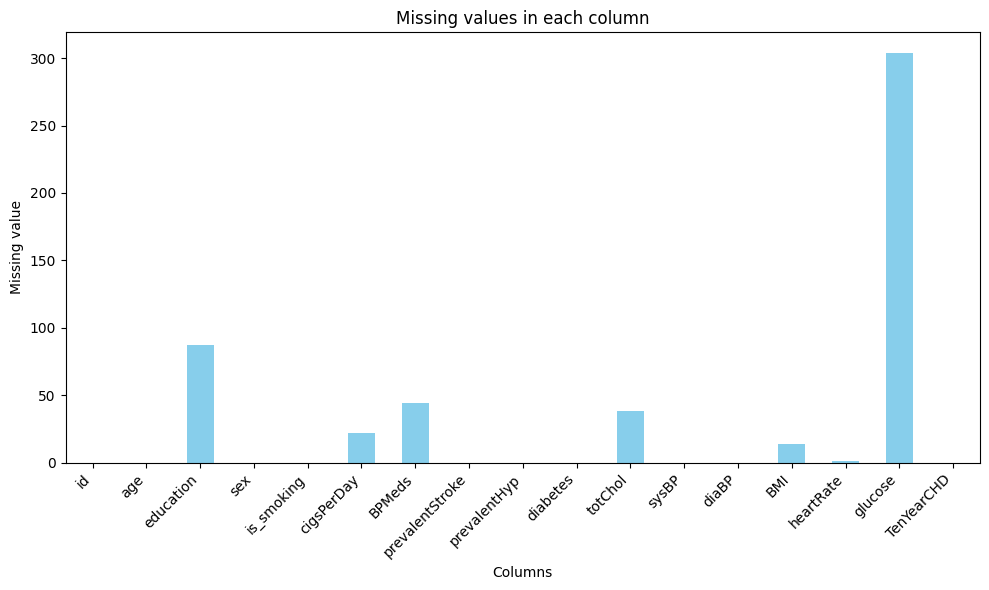

In [ ]:
plt.figure(figsize=(10,6))
(df.isna().sum()).plot(kind = 'bar', color= 'skyblue' )
plt.title('Missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Missing value')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [ ]:
msng_perc = (df.isnull().mean() * 100).sort_values(ascending = False)
msng_perc

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

In [ ]:
columns_to_fill = ['glucose','BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

# Fill missing values with median
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


In [ ]:
df['education'].fillna(df['education'].mode()[0], inplace=True)




*   We can fill missing values of these columns 'glucose','BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate' using median.

*   We can fill missing values of 'education' using mode.



In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
3385    False
3386    False
3387    False
3388    False
3389    False
Length: 3390, dtype: bool



*   There is no duplicate values in this dataset.




In [ ]:
#select numerical columns
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols

id  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0        0   64        2.0         3.0     0.0                0             0   
1        1   36        4.0         0.0     0.0                0             1   
2        2   46        1.0        10.0     0.0                0             0   
3        3   50        1.0        20.0     0.0                0             1   
4        4   64        1.0        30.0     0.0                0             0   
...    ...  ...        ...         ...     ...              ...           ...   
3385  3385   60        1.0         0.0     0.0                0             0   
3386  3386   46        1.0         0.0     0.0                0             0   
3387  3387   44        3.0         3.0     0.0                0             1   
3388  3388   60        1.0         0.0     0.0                0             1   
3389  3389   54        3.0         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0  25.38       90.0     80.0           1  
1            0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2            0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3            0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4            0    241.0  136.5   85.0  26.42       70.0     77.0           0  
...        ...      ...    ...    ...    ...        ...      ...         ...  
3385         0    261.0  123.5   79.0  29.28       70.0    103.0           0  
3386         0    199.0  102.0   56.0  21.96       80.0     84.0           0  
3387         0    352.0  164.0  119.0  28.92       73.0     72.0           1  
3388         0    191.0  167.0  105.0  23.01       80.0     85.0           0  
3389         0    288.0  124.0   77.0  29.88       79.0     92.0           0  

[3390 rows x 15 columns]

**Exploratory Data Analysis**

**Univariate analysis**

**Distribution plot and box plot age**

In [ ]:
df['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

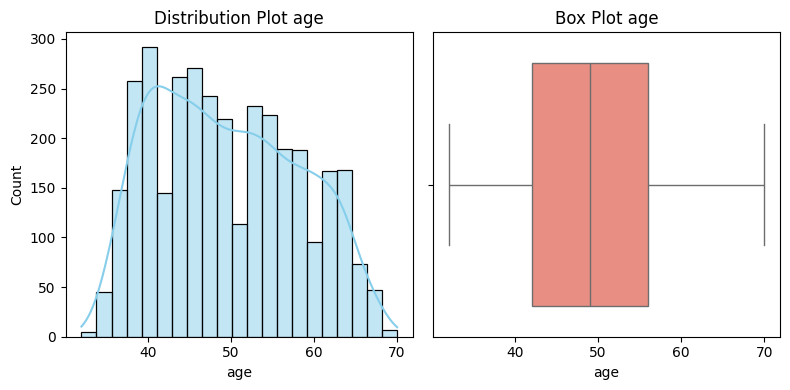

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot age')

# Box plot
sns.boxplot(x=df['age'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot age')

# Adjust layout
plt.tight_layout()
plt.show()




*   Age column is normally distributed.


*   The dataset has age group of 32 to 70.






**Distribution plot and box plot cigsperday**

In [ ]:
df['cigsPerDay'].value_counts()

0.0     1725
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

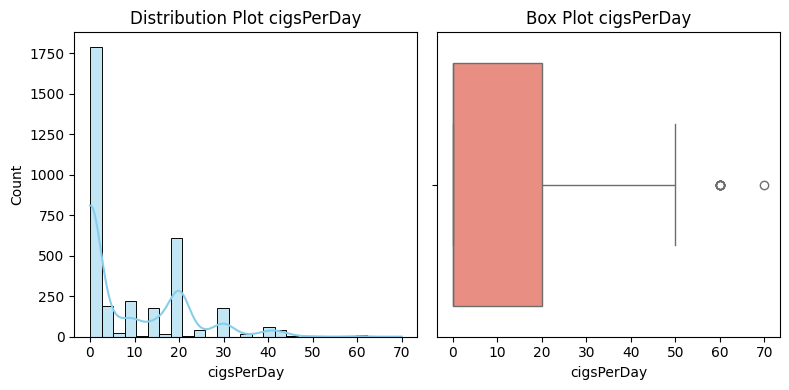

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['cigsPerDay'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot cigsPerDay')

# Box plot
sns.boxplot(x=df['cigsPerDay'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot cigsPerDay')

# Adjust layout
plt.tight_layout()
plt.show()




*   cigsperday column is positively skewed.


*   Smokers smoke 1 to 70 cigerates per day.






**Distribution plot and box plot totchol**

In [ ]:
df['totChol'].value_counts()

234.0    69
240.0    65
210.0    51
220.0    48
260.0    46
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

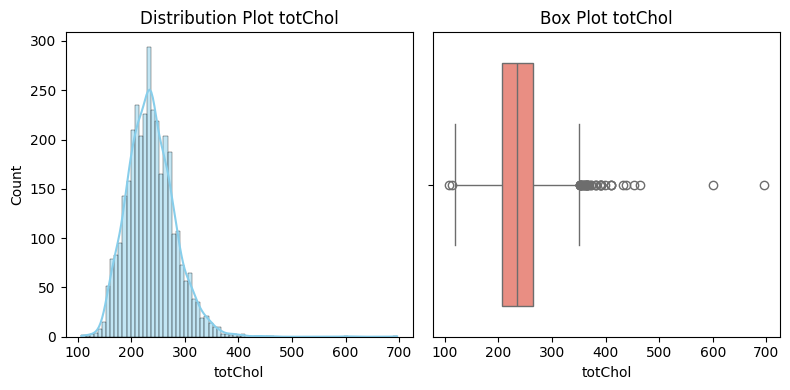

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['totChol'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot totChol')

# Box plot
sns.boxplot(x=df['totChol'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot totChol')

# Adjust layout
plt.tight_layout()
plt.show()



*   totchol is positively skewed.


*   Least totchol of a patient is 107 and highest totchol is 609.






**Distribution plot and box plot sysBP**

In [ ]:
df['sysBP'].value_counts()

110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
         ..
214.0     1
188.5     1
230.0     1
169.5     1
85.5      1
Name: sysBP, Length: 226, dtype: int64

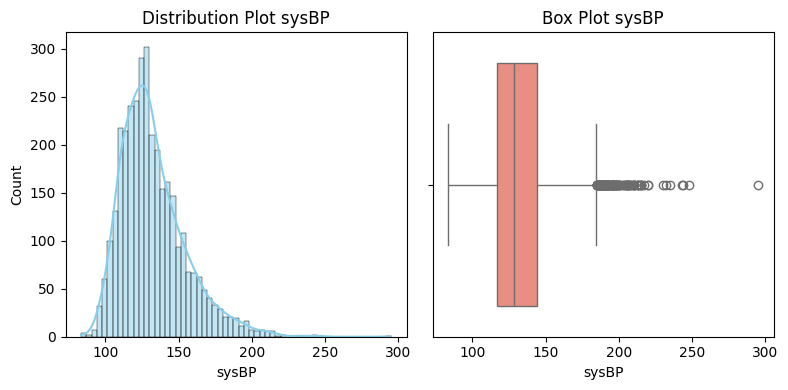

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['sysBP'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot sysBP')

# Box plot
sns.boxplot(x=df['sysBP'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot sysBP')

# Adjust layout
plt.tight_layout()
plt.show()



* sysBP is positively skewed.


*   Highest sysBP is 83.5 and 242.5.






**Distribution plot and box plot diaBP**

In [ ]:
df['diaBP'].value_counts()

80.0     213
82.0     123
70.0     109
85.0     107
90.0     100
        ... 
48.0       1
60.5       1
129.0      1
115.5      1
51.0       1
Name: diaBP, Length: 142, dtype: int64

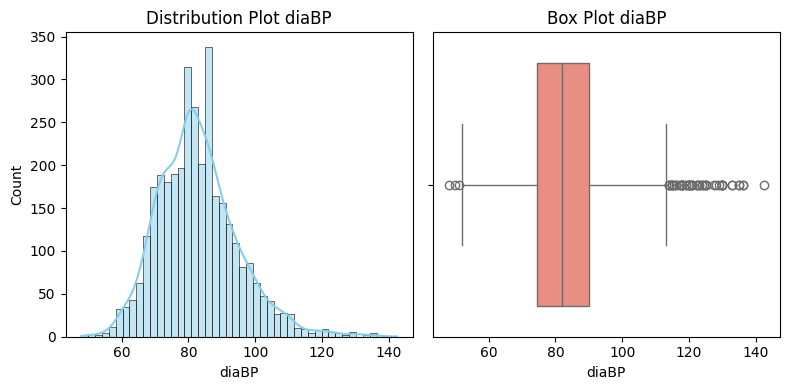

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['diaBP'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot diaBP')

# Box plot
sns.boxplot(x=df['diaBP'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot diaBP')

# Adjust layout
plt.tight_layout()
plt.show()





*   diaBP is positively skewed.
*   Least diaBP in the dataset is 48.0 and 192.5




**Distribution plot and box plot BMI**

In [ ]:
df['BMI'].value_counts()

25.38    24
22.91    17
22.54    16
22.19    15
23.48    12
         ..
39.04     1
26.66     1
29.55     1
35.58     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

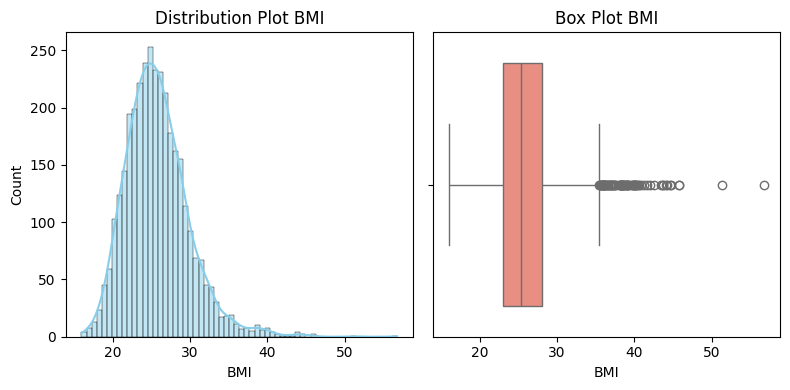

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['BMI'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot BMI')

# Box plot
sns.boxplot(x=df['BMI'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot BMI')

# Adjust layout
plt.tight_layout()
plt.show()



*   BMI is positively skewed.
*   Lowest BMI of a patient is 15.96 and highest is 58.6.



**Distribution plot and box plot heartrate**

In [ ]:
df['heartRate'].value_counts()

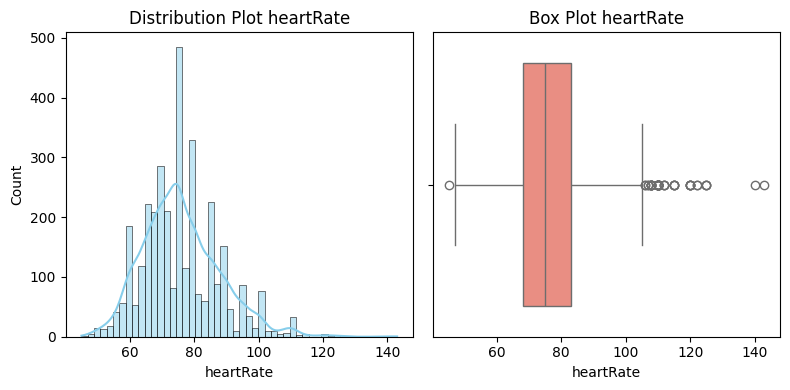

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['heartRate'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot heartRate')

# Box plot
sns.boxplot(x=df['heartRate'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot heartRate')

# Adjust layout
plt.tight_layout()
plt.show()



*  heartrate column is positively skewed.
*  Highest heartrate of a patient is 143 and least is 45.






**Distribution plot and box plot glucose**

In [ ]:
df['glucose'].value_counts()

78.0     421
75.0     149
83.0     135
70.0     123
77.0     122
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

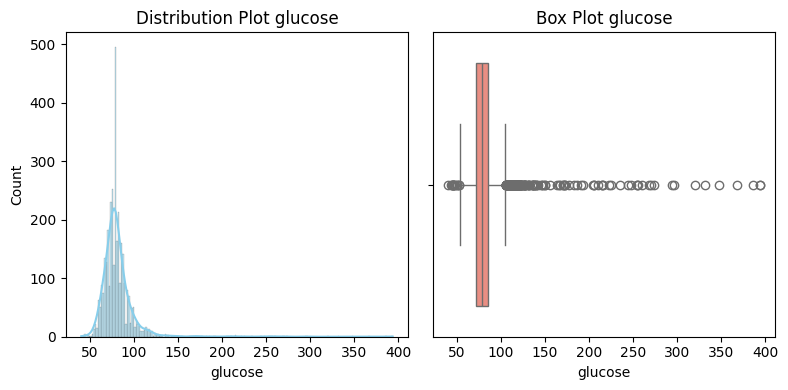

In [ ]:
# Create subplots for the distribution plot and box plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Distribution plot
sns.histplot(df['glucose'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Distribution Plot glucose')

# Box plot
sns.boxplot(x=df['glucose'], ax=axes[1], color='salmon')
axes[1].set_title(f'Box Plot glucose')

# Adjust layout
plt.tight_layout()
plt.show()



*   Glucose column is positively skewed.
*   Highest glucose of a patient is 394 and least is 40.



**Change dtype of 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' to category type**

In [ ]:
columns_to_convert = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Convert columns to category type
df[columns_to_convert] = df[columns_to_convert].astype('category')


In [ ]:
#select categorical columns
catg_cols = df.select_dtypes(include=['object','category'])

**Bar plot for categorical columns**

In [ ]:
df['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [ ]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [ ]:
df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

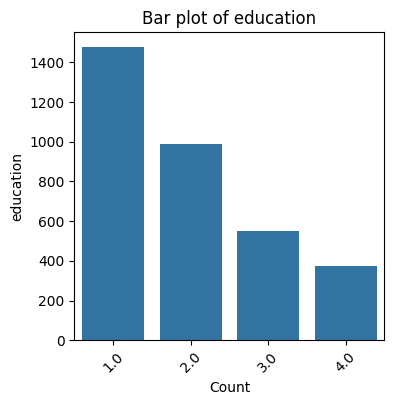

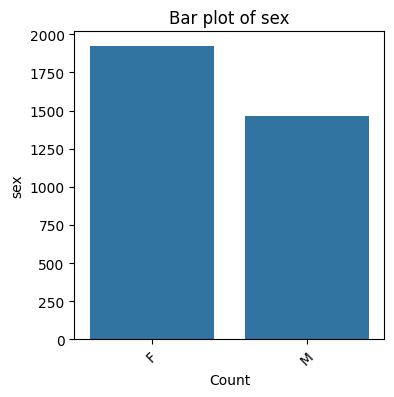

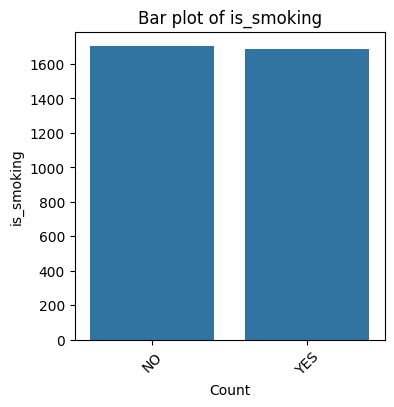

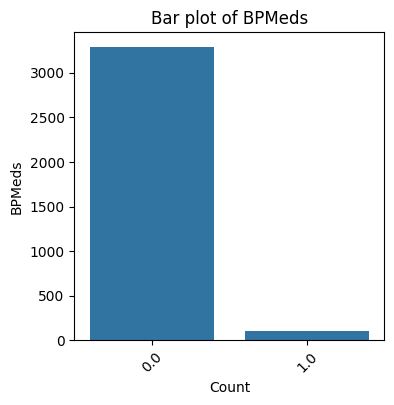

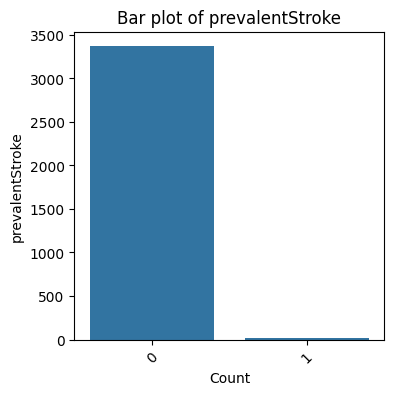

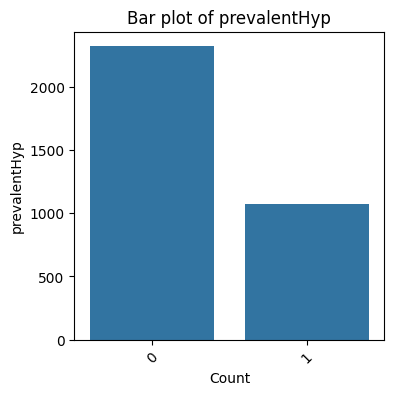

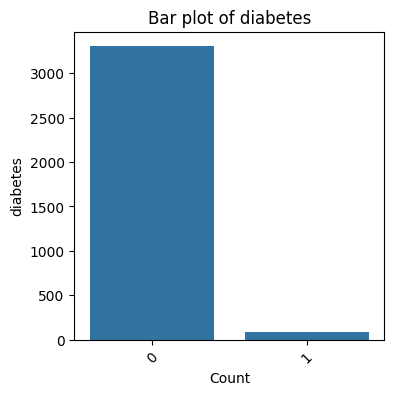

In [ ]:
#plot bar plot for categorical columns
for col in catg_cols.columns:
  plt.figure(figsize=(4,4))
  sns.countplot(x=col, data=df)
  plt.title(f'Bar plot of {col}')
  plt.ylabel(col)
  plt.xlabel('Count')
  plt.xticks(rotation=45)
  plt.show()




*   There are more non-diabetic patient in the dataset(3303).
*   There are more feamle patient in the dataset(1923).
*   There are more non-smokers in the dataset(1703).
*   In the dataset there are more patient who do not suffer from prevalent stroke or prevalent hypertension.

**Mapping the categorical values**

In [ ]:
df['sex'] = df['sex'].replace({'F':1, 'M':0})
df['is_smoking'] = df['is_smoking'].replace({'YES':1, 'NO':0})

In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()

# Drop categorical columns from numerical columns
num_cols = [col for col in df.columns if col not in cat_cols and col != 'TenYearCHD']

In [ ]:
df.head()

id       age education sex is_smoking  cigsPerDay BPMeds  \
0  0.000000  0.842105       2.0   1          1    0.042857    0.0   
1  0.000295  0.105263       4.0   0          0    0.000000    0.0   
2  0.000590  0.368421       1.0   1          1    0.142857    0.0   
3  0.000885  0.473684       1.0   0          1    0.285714    0.0   
4  0.001180  0.842105       1.0   1          1    0.428571    0.0   

  prevalentStroke prevalentHyp diabetes   totChol     sysBP     diaBP  \
0               0            0        0  0.439655  0.638614  0.559322   
1               0            1        0  0.400862  0.836634  0.779661   
2               0            0        0  0.564655  0.321782  0.322034   
3               0            1        0  0.491379  0.737624  0.610169   
4               0            0        0  0.525862  0.524752  0.559322   

        BMI  heartRate   glucose  TenYearCHD  
0  0.469162   0.767857  0.529412           1  
1  0.700580   0.446429  0.431373           0  
2  0.204006   0.732143  0.803922           0  
3  0.620980   0.375000  0.803922           1  
4  0.523985   0.410714  0.470588           0

**Bivariate analysis**

**Plot regression plot for numerical columns against the dependent column**

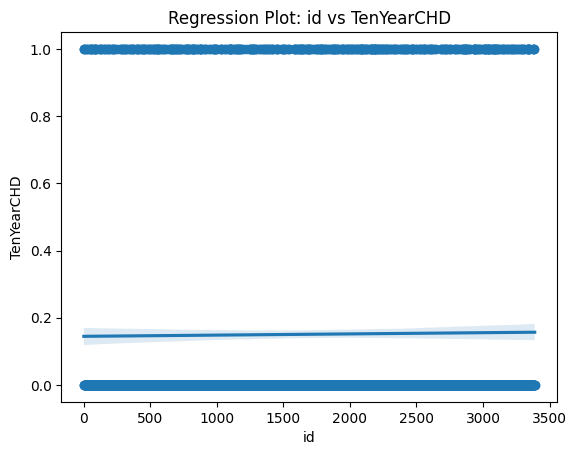

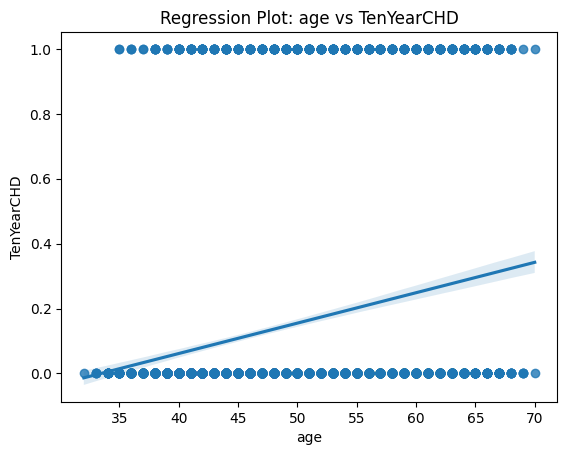

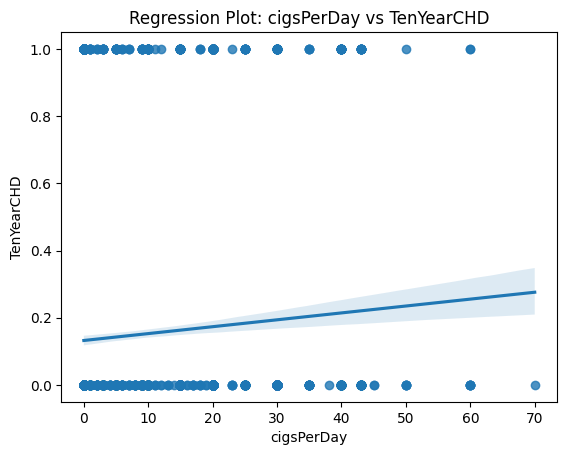

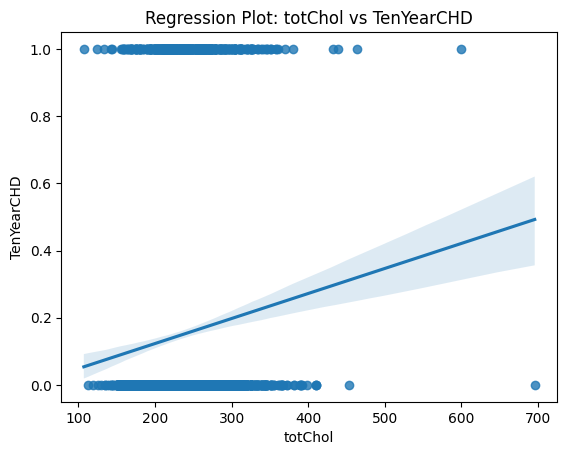

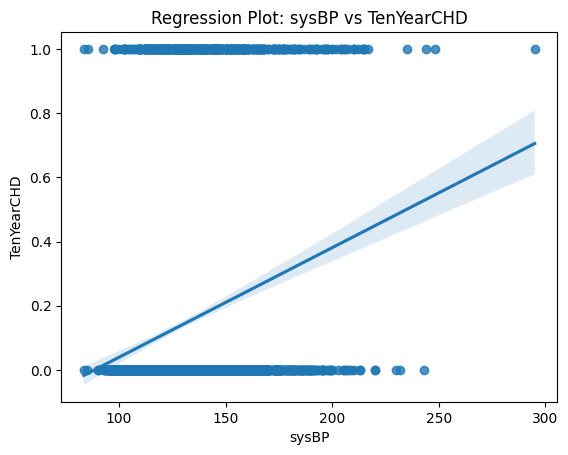

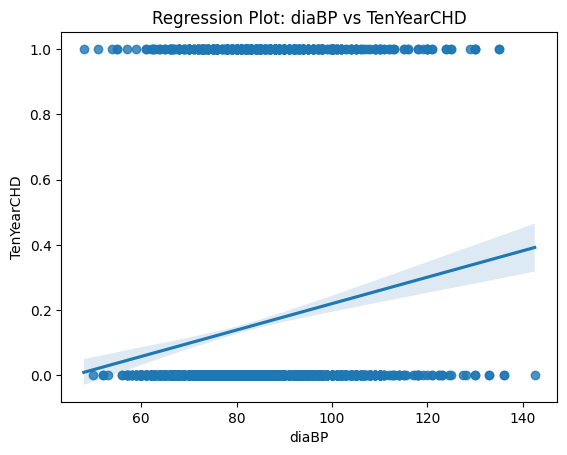

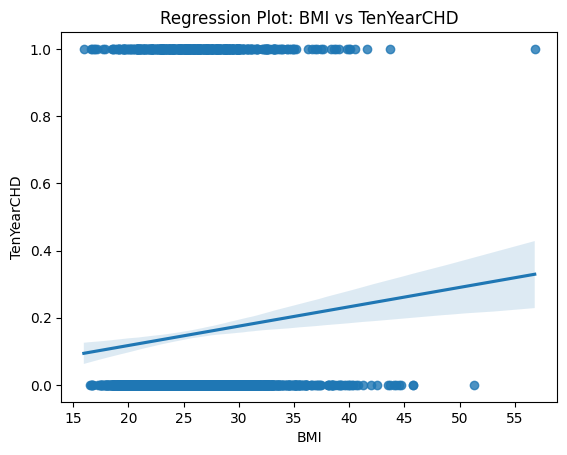

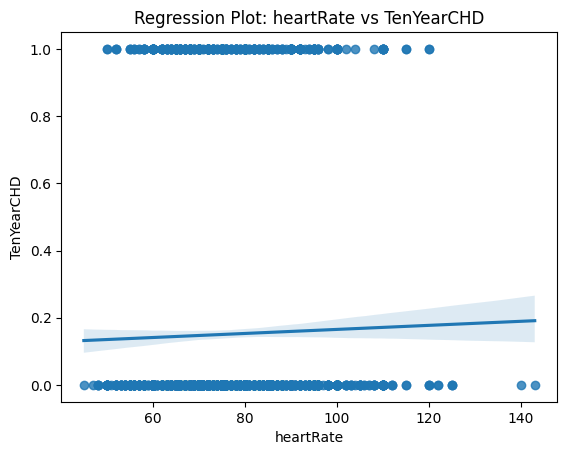

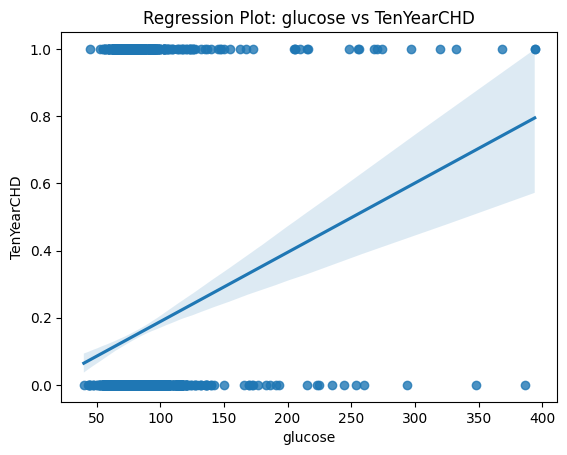

In [ ]:
# Plot regression plot for numerical columns against the dependent column
for col in num_cols:
    sns.regplot(x=col, y='TenYearCHD', data=df)
    plt.title(f'Regression Plot: {col} vs TenYearCHD')
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    plt.show()




*   There is positive relation between Age and TenYearChd.

*   There is positive relation between sysBP and TenYearChd.

*   There is positive relation between diaBP and TenYearChd.

*   There is positive relation between totchol and TenYearChd.

*   There is positive relation between BMI and TenYearChd.



**Plot bar plot for categorical columns against the dependent column**

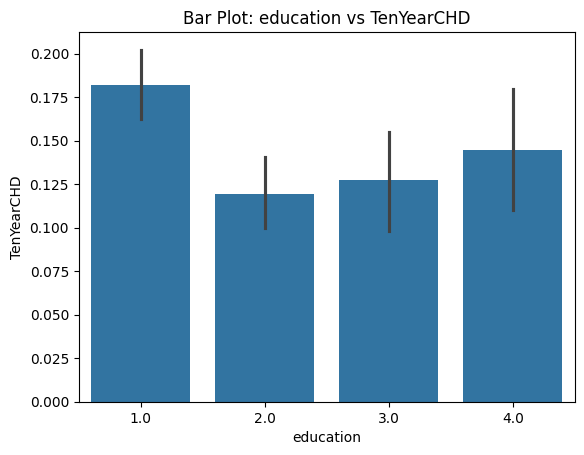

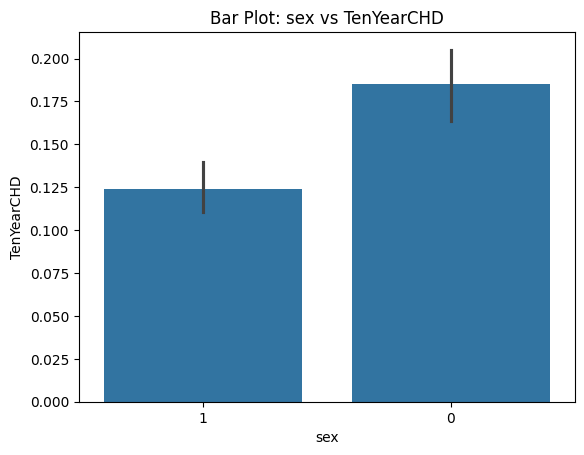

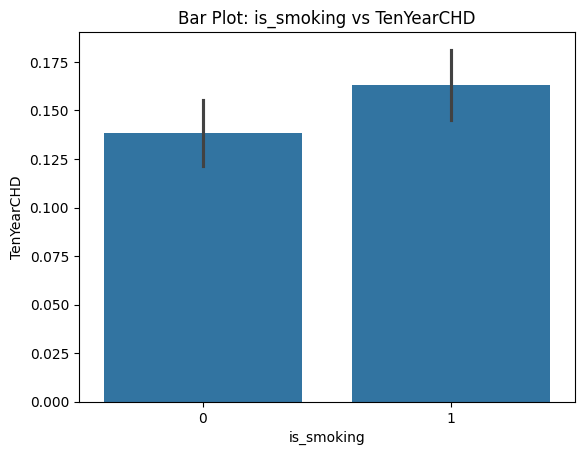

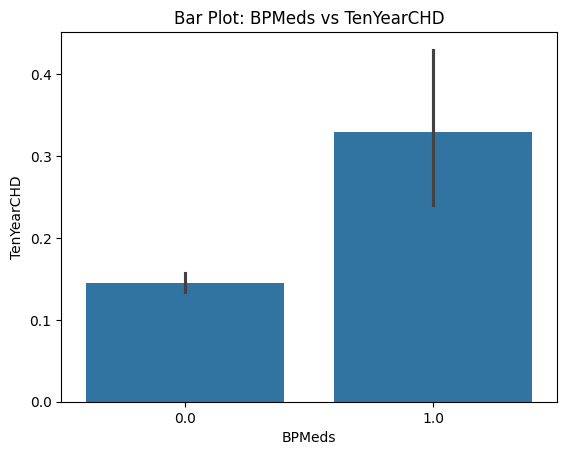

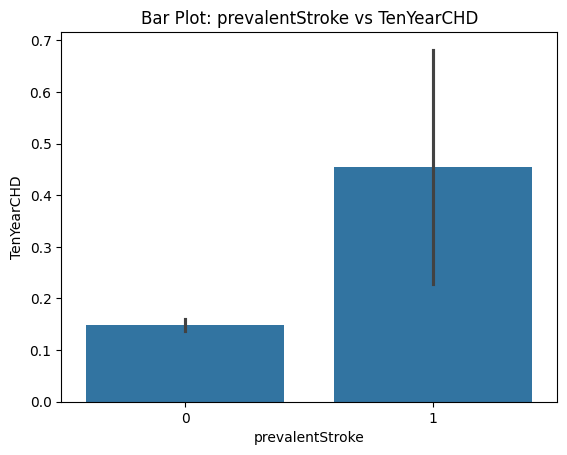

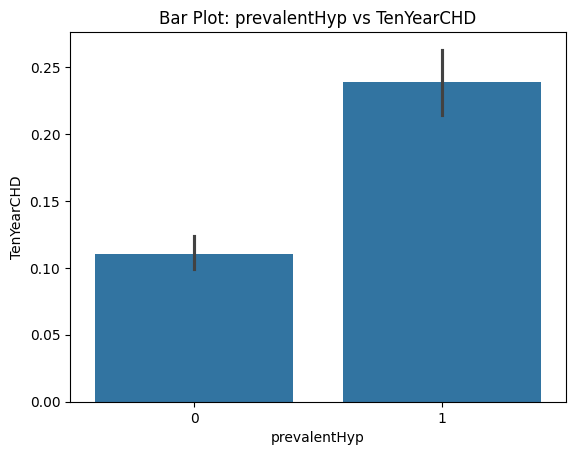

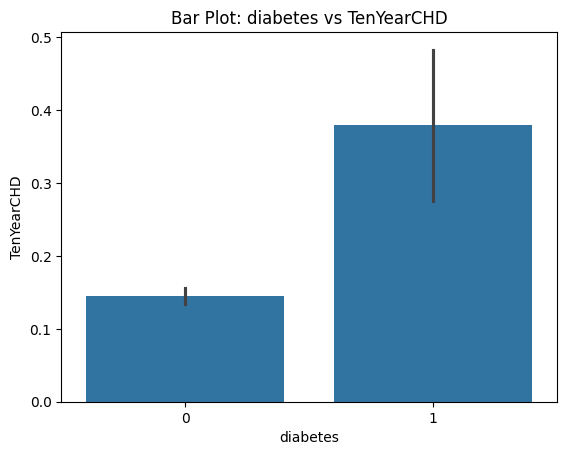

In [ ]:
# Plot bar plot for categorical columns against the dependent column
for col in catg_cols:
    sns.barplot(x=col, y='TenYearCHD', data=df)
    plt.title(f'Bar Plot: {col} vs TenYearCHD')
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    plt.show()



*   There are more patients who suffer from both diabetes and Cardiovascular diseases.

*   There are more patients who suffer from both prevalent stroke and Cardiovascular diseases.

*   There are more patients who suffer from both prevalent hypertension and Cardiovascular diseases.
*   There are more patients who take medication for blood pressure and has Cardiovascular diseases.


*   There are more patients who smoke and has Cardiovascular diseases.


*   There are more feamale patients who have cardiovascular disesases,but it can be because we have more record of female patients.



**Box plot of BMI by Gender**

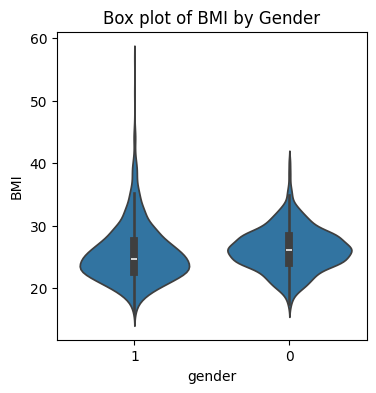

In [ ]:
plt.figure(figsize=(4,4))
sns.violinplot(x='sex', y='BMI', data=df)
plt.title('Box plot of BMI by Gender')
plt.xlabel('gender')
plt.ylabel('BMI')
plt.show()



*   Male has BMI between 20-40.
*   Female has BMI between 20-60 this shows that there are more female patient who suffer from obesity, this can be because there is more female patient record in the dataset so there is more variatio in female patient data.







**Bar plot of cigsPerDay by Gender**

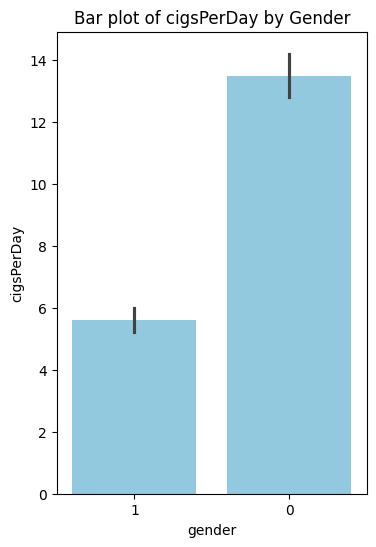

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='sex', y='cigsPerDay', data=df, color='skyblue')
plt.title('Bar plot of cigsPerDay by Gender')
plt.xlabel('gender')
plt.ylabel('cigsPerDay')
plt.show()



*   There are more male smokers despite being more female records in the dataset.




**Bar plot of sysBP by Gender**

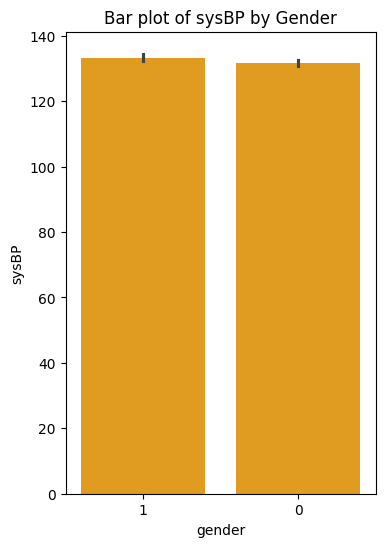

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='sex', y='sysBP', data=df, color='orange')
plt.title('Bar plot of sysBP by Gender')
plt.xlabel('gender')
plt.ylabel('sysBP')
plt.show()



*   Male and female has similar SysBP.




**Bar plot of diaBP by Gender**

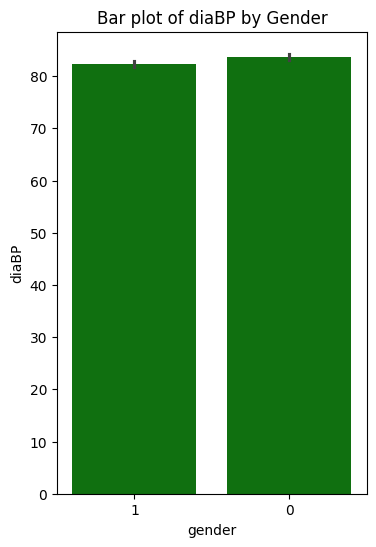

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='sex', y='diaBP', data=df, color='green')
plt.title('Bar plot of diaBP by Gender')
plt.xlabel('gender')
plt.ylabel('diaBP')
plt.show()



*   Male has higher diaBP then female.




**Bar plot of totChol by Gender**

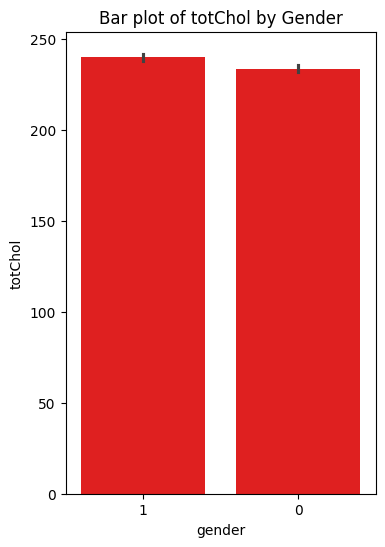

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='sex', y='totChol', data=df, color='red')
plt.title('Bar plot of totChol by Gender')
plt.xlabel('gender')
plt.ylabel('totChol')
plt.show()



*   Female has higher totchol then male.




**Bar plot of BMI by is_smoking**

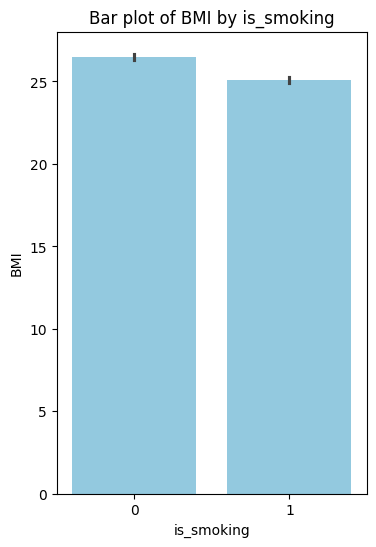

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='is_smoking', y='BMI', data=df, color='skyblue')
plt.title('Bar plot of BMI by is_smoking')
plt.xlabel('is_smoking')
plt.ylabel('BMI')
plt.show()



*   Non smokers has high BMI.



**Bar plot of diabetes by glucose**

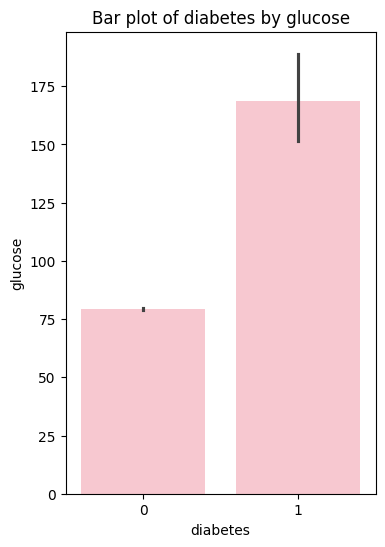

In [ ]:
plt.figure(figsize=(4,6))
sns.barplot(x='diabetes', y='glucose', data=df, color='pink')
plt.title('Bar plot of diabetes by glucose')
plt.xlabel('diabetes')
plt.ylabel('glucose')
plt.show()



*   Diabetic patient has more glucose in thier blood.




**Relationship between gender,age and TenYearCHD**

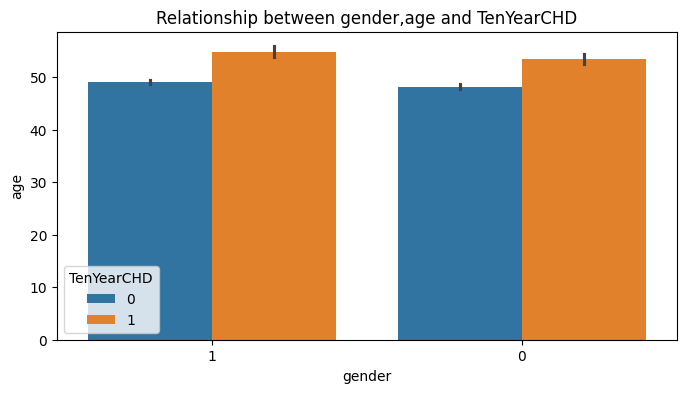

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot( data=df,x='sex', y='age', hue='TenYearCHD')
plt.title('Relationship between gender,age and TenYearCHD')
plt.xlabel('gender')
plt.ylabel('age')
plt.show()



*   Given the prevalence of female patients in our dataset, the bar plot underscores that older females, in particular, exhibit a higher incidence of cardiovascular risk.
*   In our dataset, there's a notable trend indicating that older patients are at a higher risk of cardiovascular disease



**Pairplot**

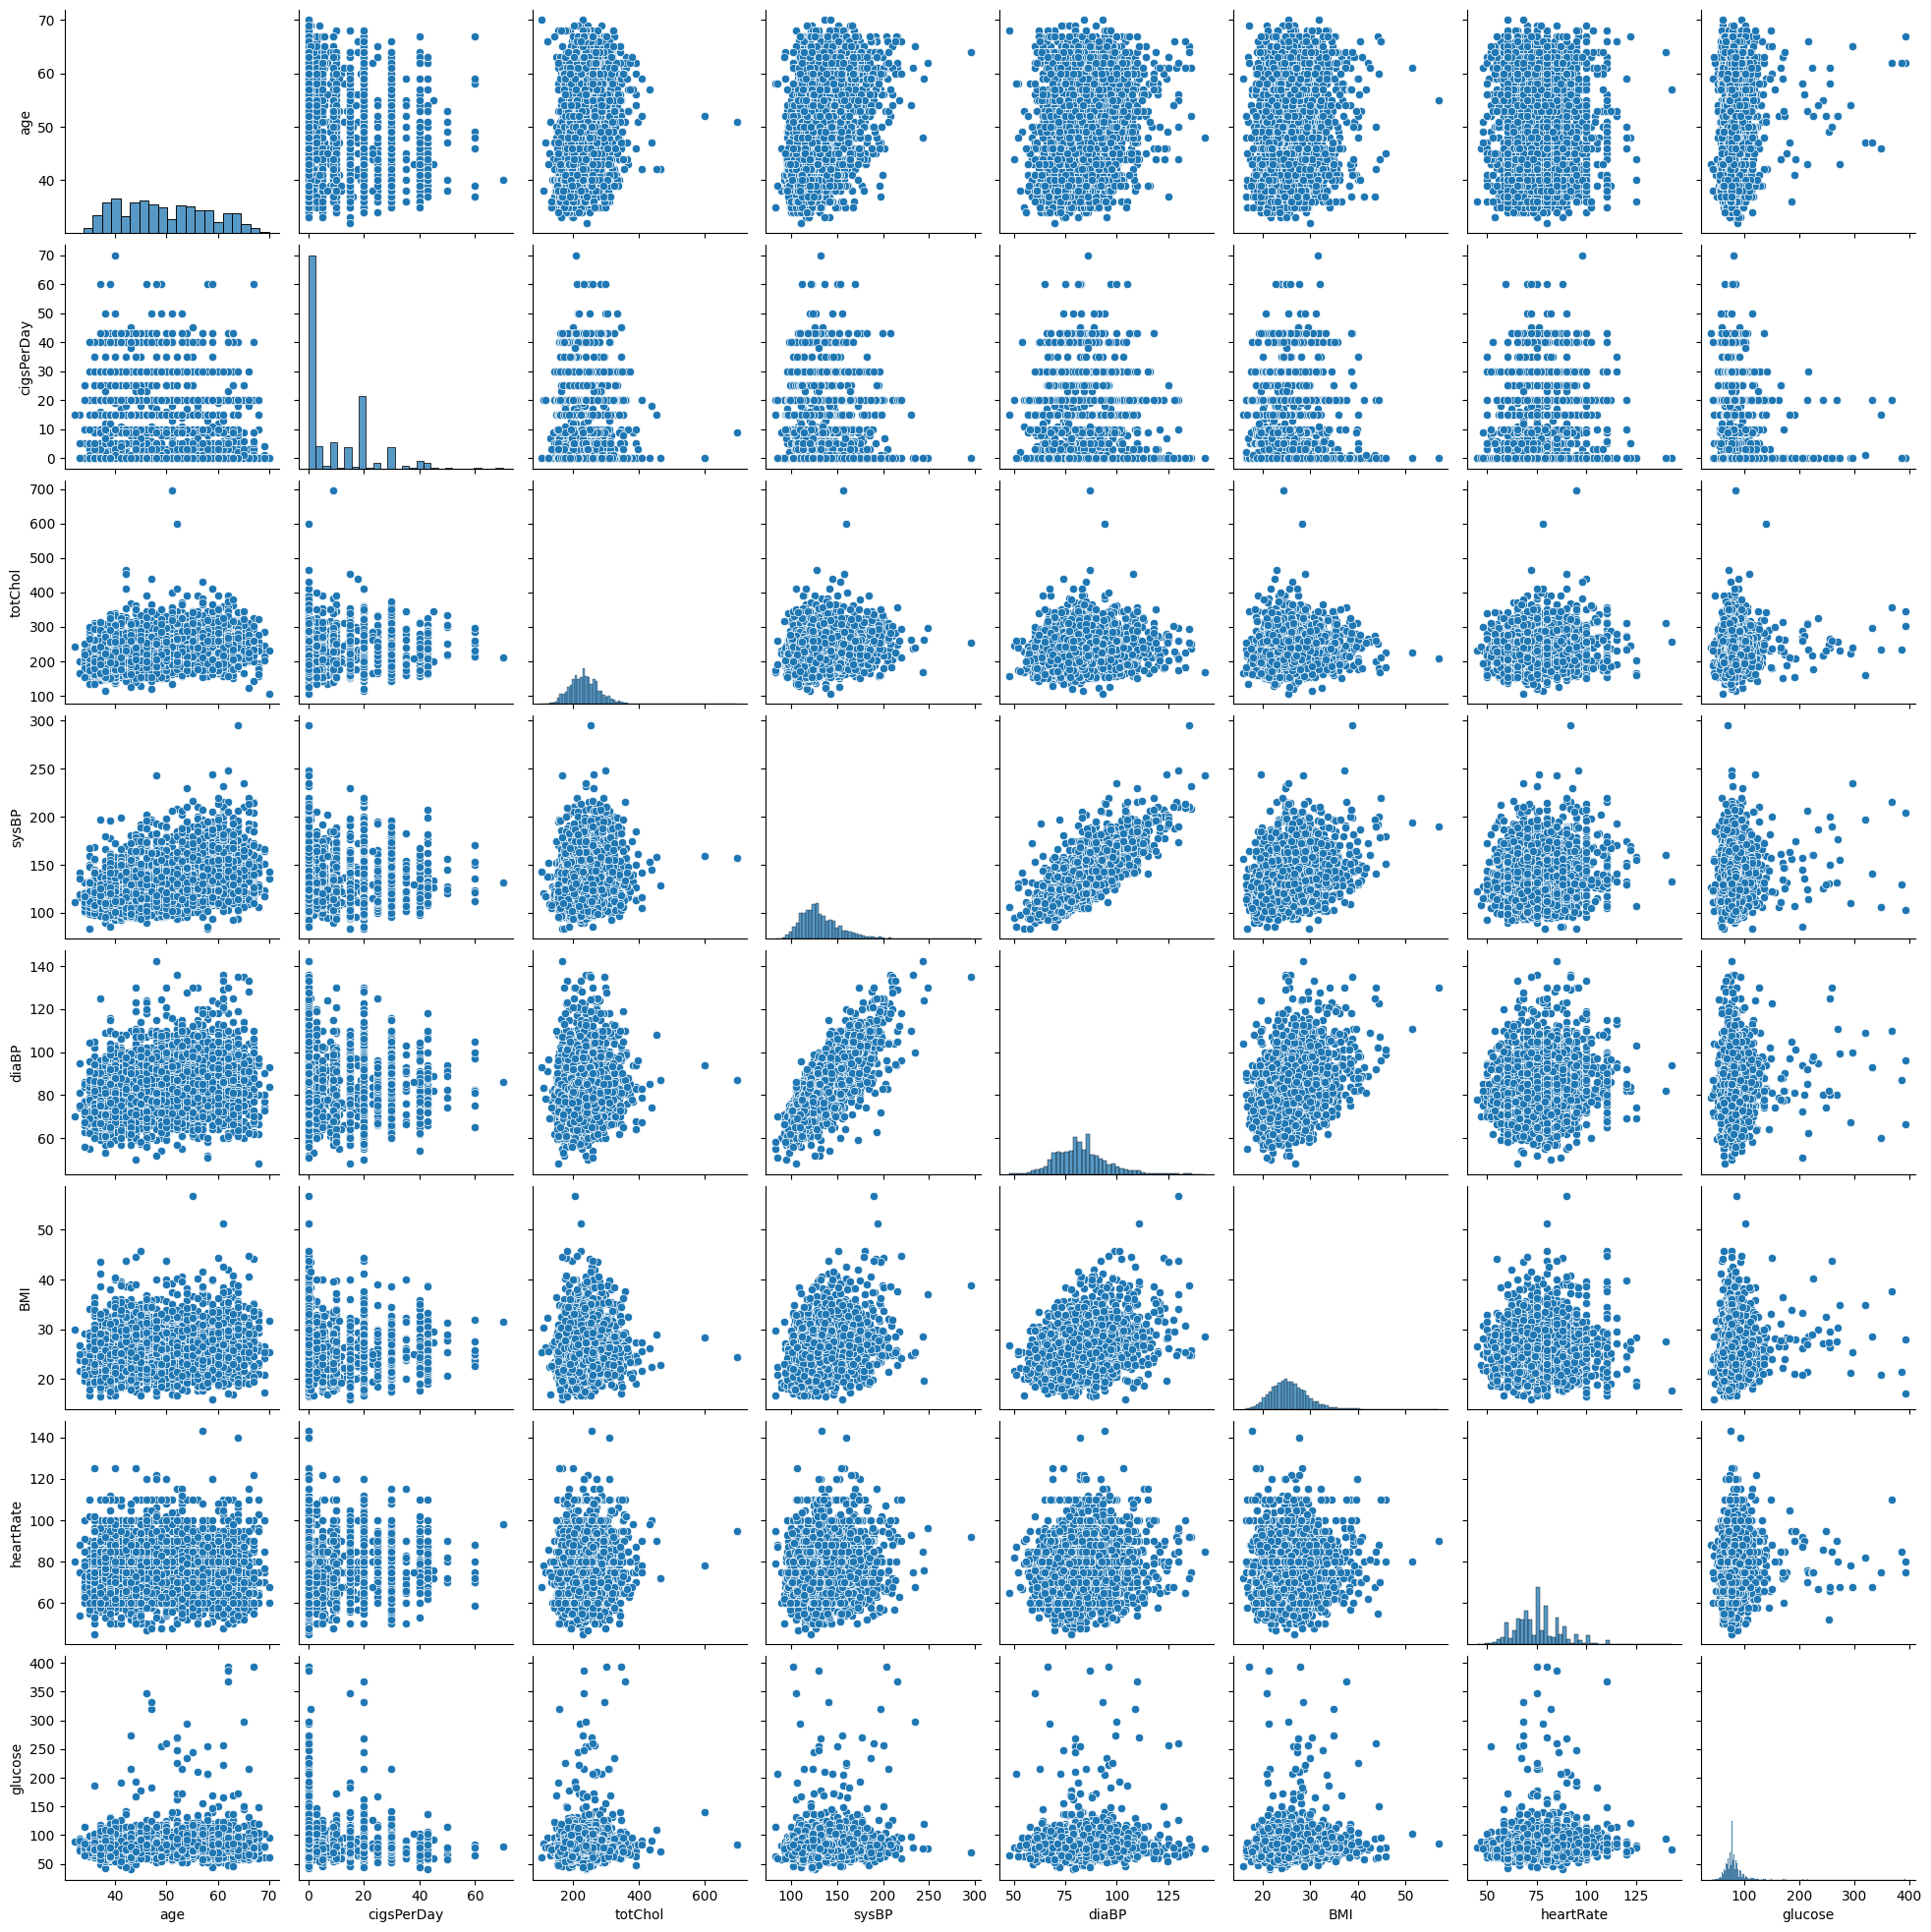

In [ ]:
# Plot pairplot
sns.pairplot(df[num_cols])
plt.show()


**Correlation Heatmap**

<ipython-input-84-27cf4e42b2b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


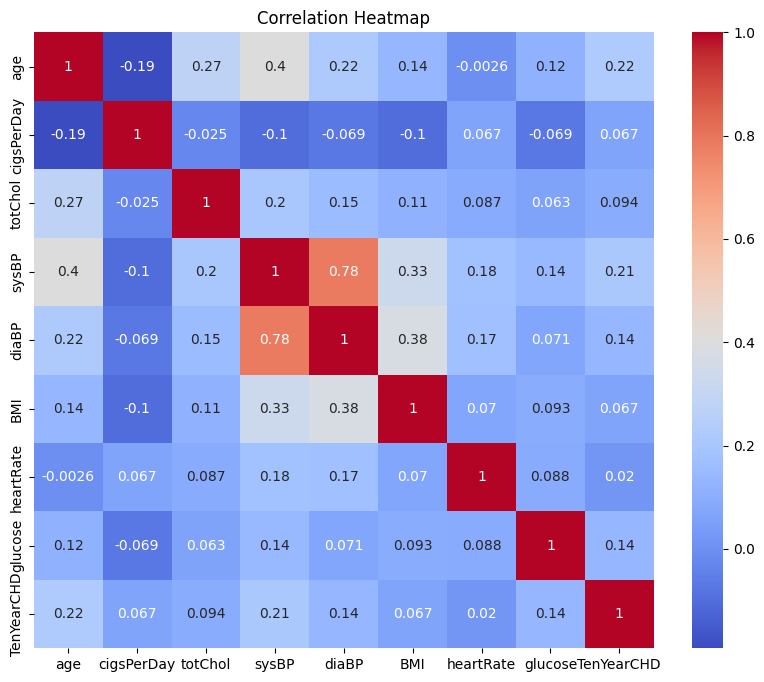

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



*   sysBP and diaBP are highly correlated(0.78).



**Removing outliers**

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower bound for column '{column}': {lower_bound}")
    print(f"Upper bound for column '{column}': {upper_bound}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to remove outliers from
columns_to_check = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
# Remove outliers for each column
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

Lower bound for column 'totChol': 119.0
Upper bound for column 'totChol': 351.0
Lower bound for column 'sysBP': 76.5
Upper bound for column 'sysBP': 184.5
Lower bound for column 'diaBP': 51.5
Upper bound for column 'diaBP': 111.5
Lower bound for column 'BMI': 15.38
Upper bound for column 'BMI': 35.46
Lower bound for column 'heartRate': 47.0
Upper bound for column 'heartRate': 103.0
Lower bound for column 'glucose': 52.5
Upper bound for column 'glucose': 104.5


**Plotting distribution plot and box plot**

In [ ]:
def plot_distribution_and_boxplot(df, column):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Distribution plot with mean and median lines
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].axvline(df[column].mean(), color='red', linestyle='--', label='Mean')
    axes[0].axvline(df[column].median(), color='blue', linestyle='--', label='Median')
    axes[0].set_title(f'Distribution Plot - {column}')
    axes[0].legend()

    # Box plot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Box Plot - {column}')

    plt.tight_layout()
    plt.show()




**Plot distribution and box plot for the 'BMI' column**

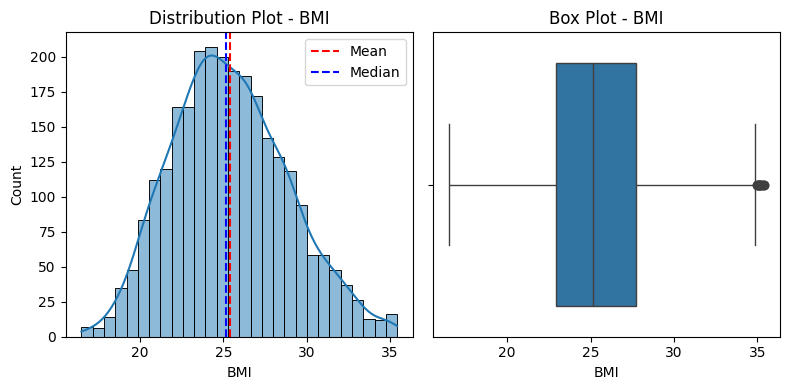

In [ ]:
# Plot distribution and box plot for the 'BMI' column
plot_distribution_and_boxplot(df, 'BMI')

**Plot distribution and box plot for the 'totChol' column**

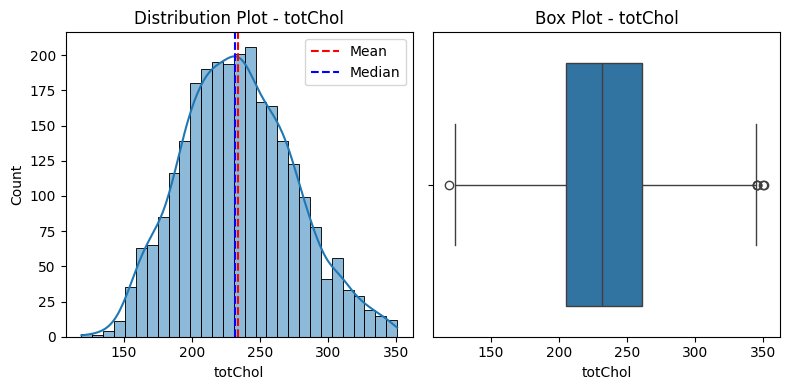

In [ ]:
# Plot distribution and box plot for the 'totChol' column
plot_distribution_and_boxplot(df, 'totChol')

**Plot distribution and box plot for the 'sysBP' column**

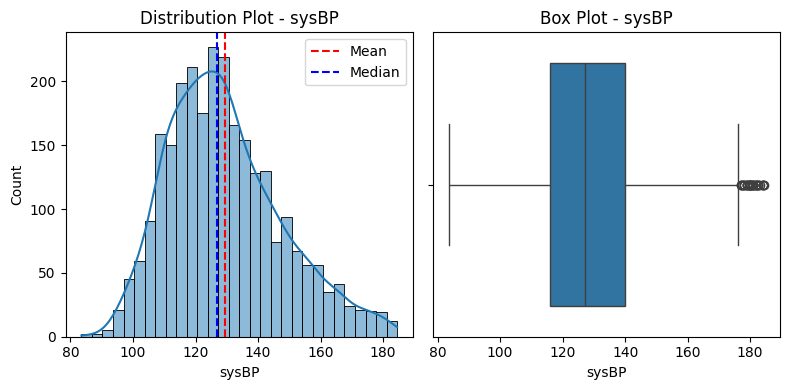

In [ ]:
# Plot distribution and box plot for the 'sysBP' column
plot_distribution_and_boxplot(df, 'sysBP')

**Plot distribution and box plot for the 'diaBP' column**

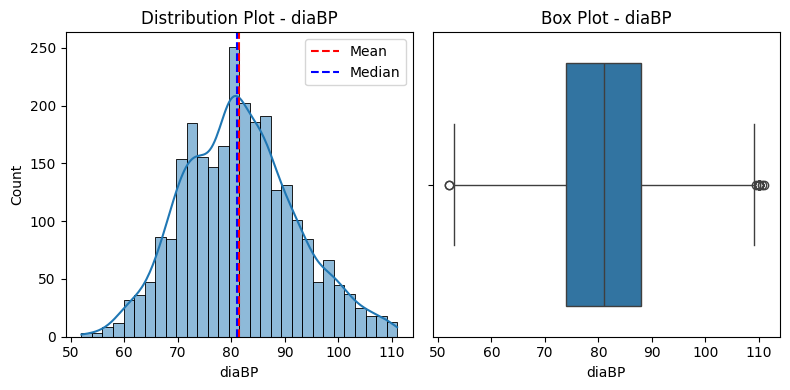

In [ ]:
# Plot distribution and box plot for the 'diaBP' column
plot_distribution_and_boxplot(df, 'diaBP')

**Plot distribution and box plot for the 'heartrate' column**

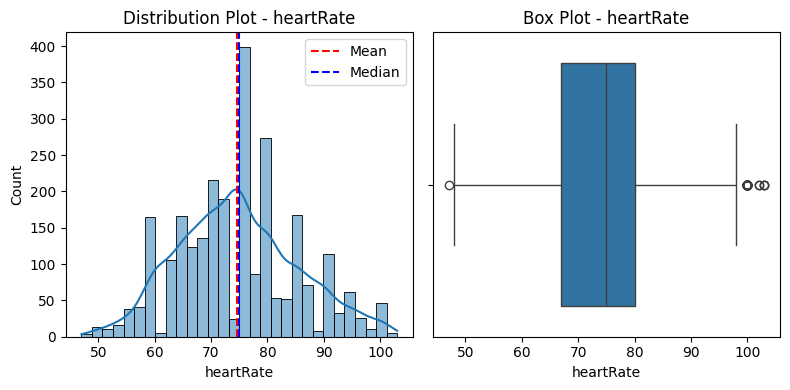

In [ ]:
# Plot distribution and box plot for the 'heartRate' column
plot_distribution_and_boxplot(df, 'heartRate')

**Plot distribution and box plot for the 'glucose' column**

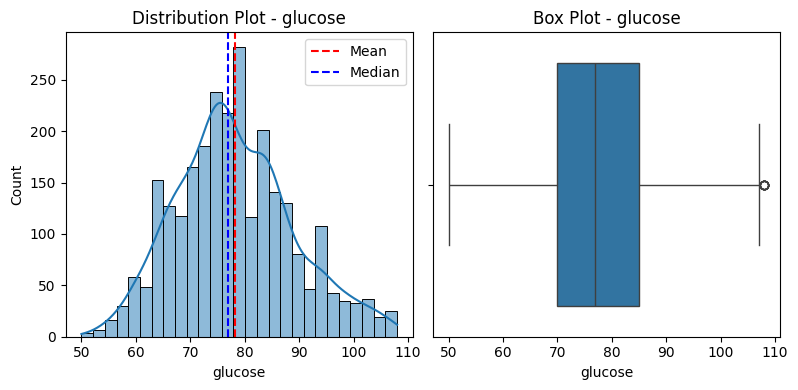

In [ ]:
# Plot distribution and box plot for the 'glucose' column
plot_distribution_and_boxplot(df, 'glucose')

**Dropping 'id' column**

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
# Update num_cols after dropping 'id'
num_cols.remove('id')

**Scaling the data(using MinMaxScaler)**

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Assuming num_cols contains the numerical column names
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude non-numeric columns if any
numeric_df = df[num_cols]

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

print(scaled_data_df)


           age  cigsPerDay   totChol     sysBP     diaBP       BMI  heartRate  \
0     0.842105    0.042857  0.439655  0.638614  0.559322  0.469162   0.767857   
1     0.105263    0.000000  0.400862  0.836634  0.779661  0.700580   0.446429   
2     0.368421    0.142857  0.564655  0.321782  0.322034  0.204006   0.732143   
3     0.473684    0.285714  0.491379  0.737624  0.610169  0.620980   0.375000   
4     0.842105    0.428571  0.525862  0.524752  0.559322  0.523985   0.410714   
...        ...         ...       ...       ...       ...       ...        ...   
2912  0.657895    0.000000  0.392241  0.470297  0.559322  0.532947   0.410714   
2913  0.736842    0.000000  0.612069  0.396040  0.457627  0.674750   0.410714   
2914  0.368421    0.000000  0.344828  0.183168  0.067797  0.288877   0.589286   
2915  0.736842    0.000000  0.310345  0.826733  0.898305  0.344228   0.589286   
2916  0.578947    0.000000  0.728448  0.400990  0.423729  0.706378   0.571429   

       glucose  TenYearCHD 

**Data Transformation**

**Log Transformation**

In [ ]:
# Exclude 'TenYearCHD' from numerical columns
num_cols_except_chd = [col for col in num_cols if col != 'TenYearCHD']

# Apply log transformation to numerical columns except 'TenYearCHD'
for col in num_cols_except_chd:
    # Add 1 to handle zero and negative values if present
    df[col] = np.log1p(df[col])

# Check the head of the DataFrame to verify the transformation
print(df.head())


        age education sex is_smoking  cigsPerDay BPMeds prevalentStroke  \
0  0.610909       2.0   1          1    0.041964    0.0               0   
1  0.100083       4.0   0          0    0.000000    0.0               0   
2  0.313658       1.0   1          1    0.133531    0.0               0   
3  0.387766       1.0   0          1    0.251314    0.0               0   
4  0.610909       1.0   1          1    0.356675    0.0               0   

  prevalentHyp diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0            0        0  0.364404  0.493851  0.444251  0.384692   0.569768   
1            1        0  0.337088  0.607934  0.576423  0.530969   0.369097   
2            0        0  0.447665  0.278981  0.279171  0.185655   0.549359   
3            1        0  0.399701  0.552519  0.476339  0.483031   0.318454   
4            0        0  0.422560  0.421832  0.444251  0.421329   0.344096   

    glucose  TenYearCHD  
0  0.424883           1  
1  0.358634           0  
2 

In [ ]:
x = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

**Balancing the class(SMOTE)**

In [ ]:
# Apply SMOTE to the target column 'TenYearCHD'
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(df.drop(columns=['TenYearCHD']), df['TenYearCHD'])

# Before SMOTE
print("Value Counts before SMOTE:")
print(df['TenYearCHD'].value_counts())

# After SMOTE
print("\nValue Counts after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Update the target column in the existing DataFrame
df['TenYearCHD'] = y_resampled

# Check the head of the DataFrame to verify the changes
print("\nHead of DataFrame after applying SMOTE:")
print(df.head())


Value Counts before SMOTE:
0    2529
1     388
Name: TenYearCHD, dtype: int64

Value Counts after SMOTE:
1    2529
0    2529
Name: TenYearCHD, dtype: int64

Head of DataFrame after applying SMOTE:
        age education sex is_smoking  cigsPerDay BPMeds prevalentStroke  \
0  0.610909       2.0   1          1    0.041964    0.0               0   
1  0.100083       4.0   0          0    0.000000    0.0               0   
2  0.313658       1.0   1          1    0.133531    0.0               0   
3  0.387766       1.0   0          1    0.251314    0.0               0   
4  0.610909       1.0   1          1    0.356675    0.0               0   

  prevalentHyp diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0            0        0  0.364404  0.493851  0.444251  0.384692   0.569768   
1            1        0  0.337088  0.607934  0.576423  0.530969   0.369097   
2            0        0  0.447665  0.278981  0.279171  0.185655   0.549359   
3            1        0  0.399701  0.552

In [ ]:
df['TenYearCHD'].unique()

array([1, 0])

**Splitting the data into training and testing set**

In [ ]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['TenYearCHD']),
                                                    df['TenYearCHD'],
                                                    test_size=0.2,
                                                    random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (2333, 15) (2333,)
Testing set shape: (584, 15) (584,)


**Model Implementation**

**Model1: Linear Regression**

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Prediction
y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)


Train Accuracy: 0.7535362194599229
Test Accuracy: 0.7311643835616438
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1 score: 0.0
Test F1 score: 0.0


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5
Test AUC-ROC score: 0.5


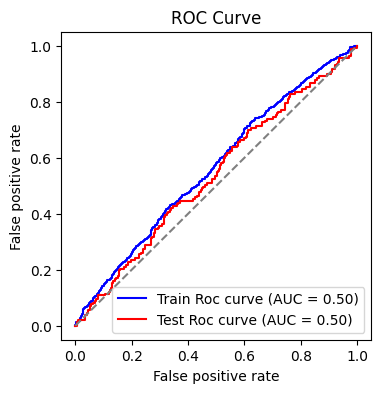

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()


In [ ]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_binary))

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_binary))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1758
           1       0.00      0.00      0.00       575

    accuracy                           0.75      2333
   macro avg       0.38      0.50      0.43      2333
weighted avg       0.57      0.75      0.65      2333

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       427
           1       0.00      0.00      0.00       157

    accuracy                           0.73       584
   macro avg       0.37      0.50      0.42       584
weighted avg       0.53      0.73      0.62       584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

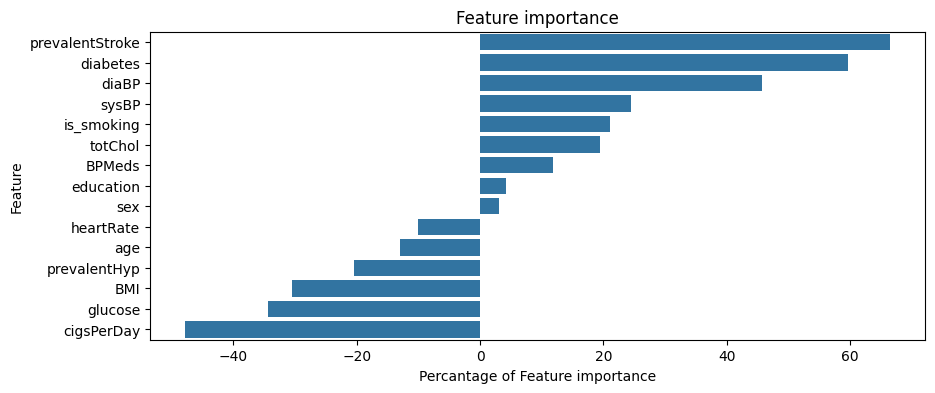

In [ ]:
# Feature importance
importance = lr_model.coef_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature':feature_names, 'Importance':importance})
feature_importance_df['Importance'] = (feature_importance_df['Importance']/feature_importance_df['Importance'].sum())*100

# Plot feature importance
plt.figure(figsize=(10,4))
sns.barplot(x='Importance',y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature importance')
plt.xlabel('Percantage of Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Print feature importance table
print("Feature importance:")
print(feature_importance_df)

Feature importance:
            Feature  Importance
0               age  -13.026353
1         education    4.236557
2               sex    3.063710
3        is_smoking   21.117265
4        cigsPerDay  -47.815463
5            BPMeds   11.854811
6   prevalentStroke   66.439357
7      prevalentHyp  -20.383659
8          diabetes   59.674074
9           totChol   19.431969
10            sysBP   24.545436
11            diaBP   45.729031
12              BMI  -30.449907
13        heartRate  -10.093068
14          glucose  -34.323760


**Model2: Lasso Regression**

In [ ]:
# Train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [ ]:
# Prediction
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)


Train Accuracy: 0.7535362194599229
Test Accuracy: 0.7311643835616438
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1 score: 0.0
Test F1 score: 0.0


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5
Test AUC-ROC score: 0.5


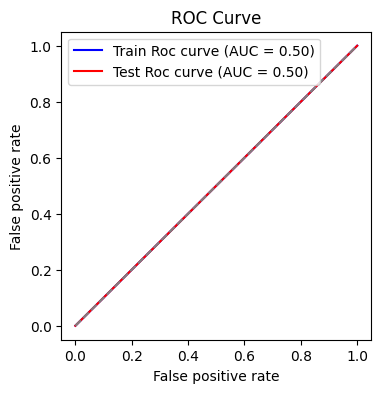

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()


**Model3: Ridge Regression**

In [ ]:
# Train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [ ]:
# Prediction
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)

Train Accuracy: 0.6510930132876125
Test Accuracy: 0.6181506849315068
Train Precision: 1.0
Test Precision: 0.0
Train Recall: 0.001226993865030675
Test Recall: 0.0
Train F1 score: 0.0024509803921568627
Test F1 score: 0.0


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5006134969325153
Test AUC-ROC score: 0.5


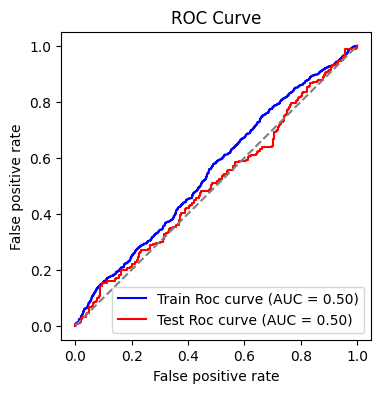

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
print("Coefficiets:")
print(ridge_model.coef_)

Coefficiets:
[ 0.02682645 -0.03722155  0.00445727 -0.00105385 -0.00587667 -0.01908033
 -0.27422328  0.03192079 -0.04391353 -0.1237447   0.05175421 -0.20961289
  0.16638649  0.08024691  0.20257721]


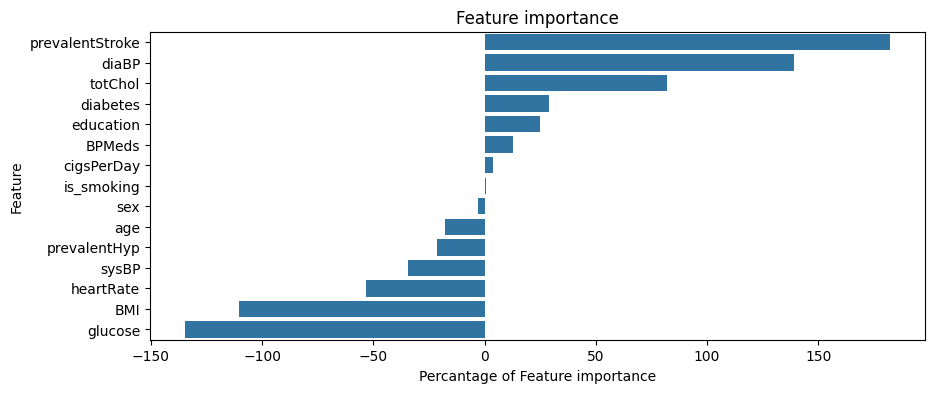

In [ ]:
# Feature importance
importance = ridge_model.coef_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature':feature_names, 'Importance':importance})
feature_importance_df['Importance'] = (feature_importance_df['Importance']/feature_importance_df['Importance'].sum())*100

# Plot feature importance
plt.figure(figsize=(10,4))
sns.barplot(x='Importance',y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature importance')
plt.xlabel('Percantage of Feature importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
# Print feature importance table
print("Feature importance:")
print(feature_importance_df)

Feature importance:
            Feature  Importance
0               age  -17.818083
1         education   24.722490
2               sex   -2.960510
3        is_smoking    0.699962
4        cigsPerDay    3.903275
5            BPMeds   12.673123
6   prevalentStroke  182.138612
7      prevalentHyp  -21.201730
8          diabetes   29.167292
9           totChol   82.191009
10            sysBP  -34.375057
11            diaBP  139.224509
12              BMI -110.513613
13        heartRate  -53.299856
14          glucose -134.551423


**Model4: Logistic regression**

In [ ]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Train the model
logistic_regression.fit(x_train, y_train)

# Predictions on the training set
y_train_pred = logistic_regression.predict(x_train)

# Predictions on the testing set
y_test_pred = logistic_regression.predict(x_test)


In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)

Train Accuracy: 0.7535362194599229
Test Accuracy: 0.7311643835616438
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1 score: 0.0
Test F1 score: 0.0


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5
Test AUC-ROC score: 0.5


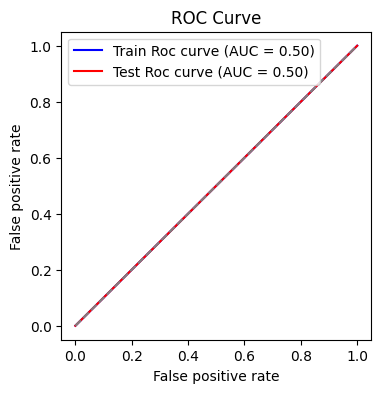

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_binary))

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_binary))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1758
           1       0.00      0.00      0.00       575

    accuracy                           0.75      2333
   macro avg       0.38      0.50      0.43      2333
weighted avg       0.57      0.75      0.65      2333

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       427
           1       0.00      0.00      0.00       157

    accuracy                           0.73       584
   macro avg       0.37      0.50      0.42       584
weighted avg       0.53      0.73      0.62       584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Model5:Elastic Net Regression**

In [ ]:
# Train ElasticNet Regression model
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train,y_train)

ElasticNet()

In [ ]:
# Prediction
y_train_pred = elasticnet_model.predict(x_train)
y_test_pred = elasticnet_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)

Train Accuracy: 0.7535362194599229
Test Accuracy: 0.7311643835616438
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1 score: 0.0
Test F1 score: 0.0


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5
Test AUC-ROC score: 0.5


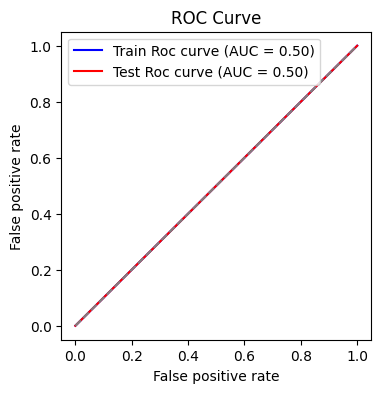

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_binary))

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_binary))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1758
           1       0.00      0.00      0.00       575

    accuracy                           0.75      2333
   macro avg       0.38      0.50      0.43      2333
weighted avg       0.57      0.75      0.65      2333

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       427
           1       0.00      0.00      0.00       157

    accuracy                           0.73       584
   macro avg       0.37      0.50      0.42       584
weighted avg       0.53      0.73      0.62       584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Model6: Decision Tree Classifier**

In [ ]:
# Train Decision Tree Regression model with a maximum depth
decision_tree_model = DecisionTreeClassifier(random_state=42,max_depth=7)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

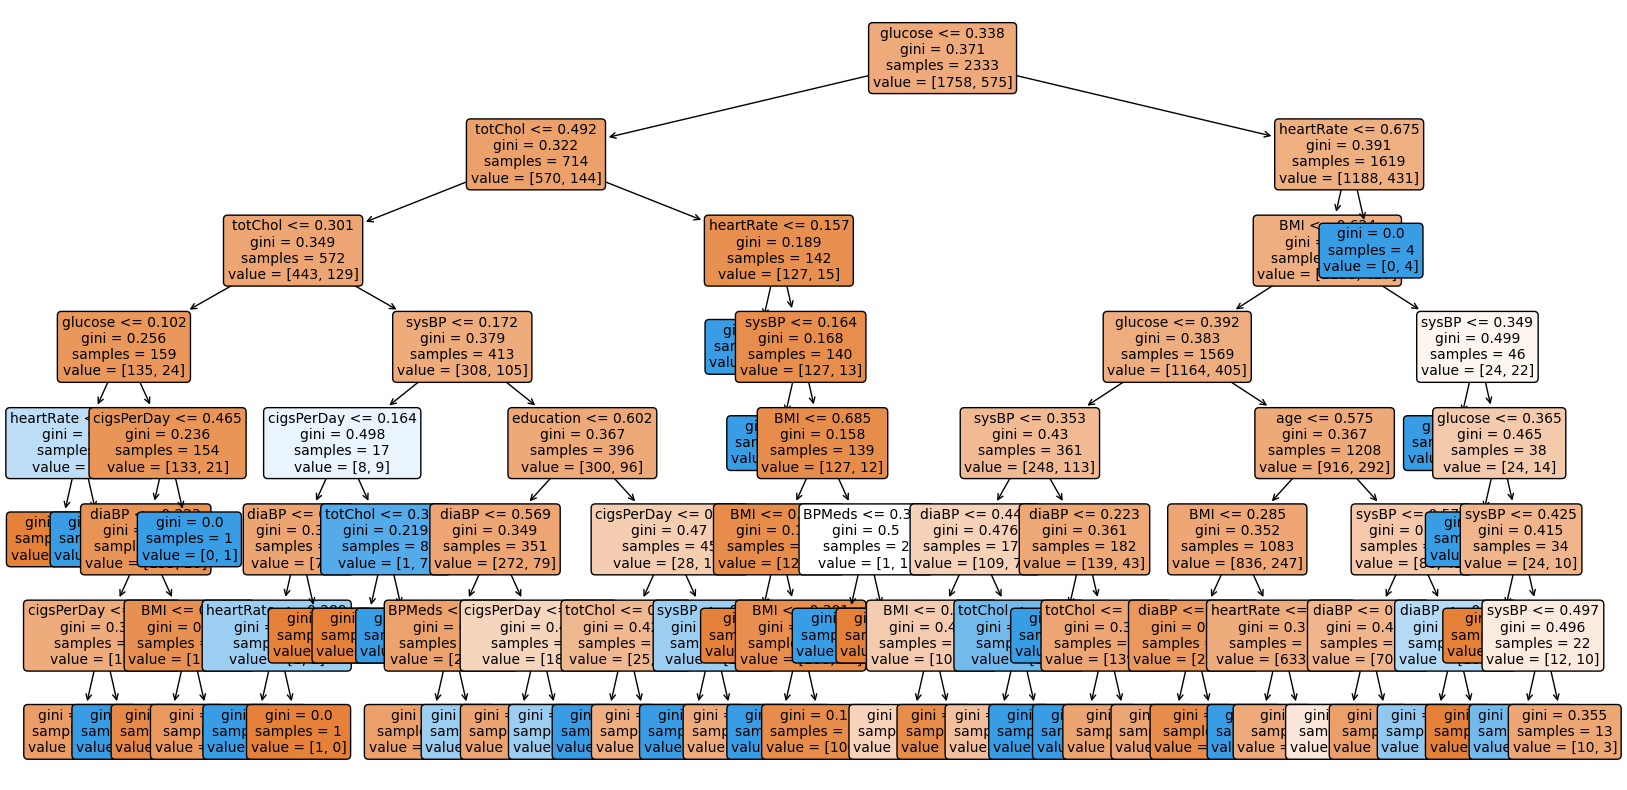

In [ ]:
# Plot decision tree graph
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(decision_tree_model, feature_names=x_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()


In [ ]:
# Prediction
y_train_pred = decision_tree_model.predict(x_train)
y_test_pred = decision_tree_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)


Train Accuracy: 0.7861123017573939
Test Accuracy: 0.7277397260273972
Train Precision: 0.8584905660377359
Test Precision: 0.45
Train Recall: 0.1582608695652174
Test Recall: 0.05732484076433121
Train F1 score: 0.26725403817914833
Test F1 score: 0.10169491525423728


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5748642231785132
Test AUC-ROC score: 0.5157818583212757


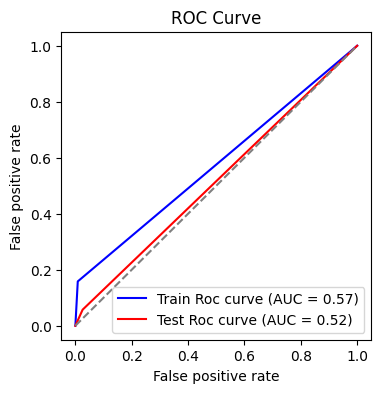

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

**Model7: Random Forest classifier**

In [ ]:
# Train Random Forest Regression model
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 10, random_state=42)
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Prediction
y_train_pred = random_forest_model.predict(x_train)
y_test_pred = random_forest_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)


Train Accuracy: 0.7946849549935705
Test Accuracy: 0.7311643835616438
Train Precision: 1.0
Test Precision: 0.0
Train Recall: 0.16695652173913045
Test Recall: 0.0
Train F1 score: 0.28614008941877794
Test F1 score: 0.0


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5834782608695652
Test AUC-ROC score: 0.5


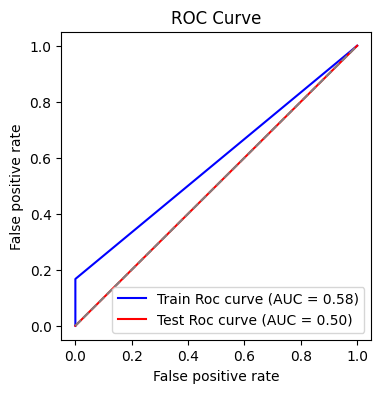

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_binary))

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_binary))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1758
           1       1.00      0.17      0.29       575

    accuracy                           0.79      2333
   macro avg       0.89      0.58      0.58      2333
weighted avg       0.84      0.79      0.73      2333

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       427
           1       0.00      0.00      0.00       157

    accuracy                           0.73       584
   macro avg       0.37      0.50      0.42       584
weighted avg       0.53      0.73      0.62       584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model8: Gradient Boost classifier**

In [ ]:
# Train Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Prediction
y_train_pred = gradient_boosting_model.predict(x_train)
y_test_pred = gradient_boosting_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)


Train Accuracy: 0.7775396485212173
Test Accuracy: 0.7363013698630136
Train Precision: 0.9827586206896551
Test Precision: 0.6363636363636364
Train Recall: 0.09913043478260869
Test Recall: 0.044585987261146494
Train F1 score: 0.18009478672985782
Test F1 score: 0.08333333333333333


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.5492808032843647
Test AUC-ROC score: 0.5176091528811587


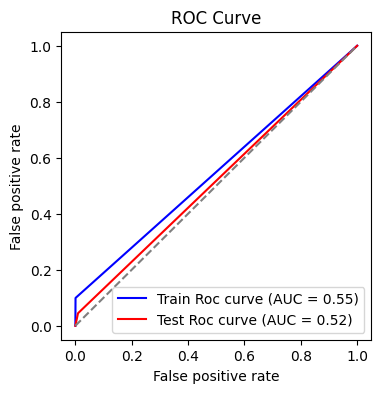

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))
plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

**MODEL9: KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train KNN Regression model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# prediction
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)


Train Accuracy: 0.7672524646378054
Test Accuracy: 0.684931506849315
Train Precision: 0.5909090909090909
Test Precision: 0.2
Train Recall: 0.1808695652173913
Test Recall: 0.05732484076433121
Train F1 score: 0.27696404793608526
Test F1 score: 0.08910891089108912


In [ ]:
# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)


Train AUC-ROC score: 0.569956966909037
Test AUC-ROC score: 0.48650785363743493


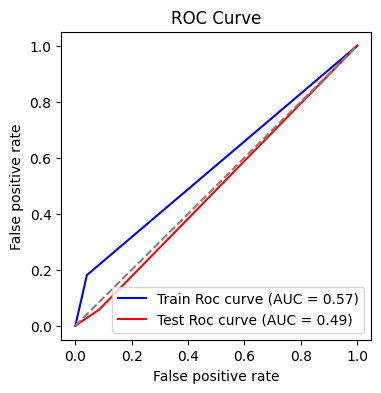

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))

plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_binary))

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_binary))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1758
           1       0.59      0.18      0.28       575

    accuracy                           0.77      2333
   macro avg       0.69      0.57      0.57      2333
weighted avg       0.73      0.77      0.72      2333

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       427
           1       0.20      0.06      0.09       157

    accuracy                           0.68       584
   macro avg       0.46      0.49      0.45       584
weighted avg       0.58      0.68      0.62       584



**Model10: Support Vector Machine (SVM) classifier**

In [ ]:
# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# prediction
y_train_pred = svm_classifier.predict(x_train)
y_test_pred = svm_classifier.predict(x_test)

# Convert probabilities to binary predictions
y_train_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_train_pred]
y_test_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_test_pred]

In [ ]:
# Confusion matrix
conf_matrix_train = confusion_matrix(y_train,y_train_pred_binary)
conf_matrix_test = confusion_matrix(y_test,y_test_pred_binary)

# Evaluation matrcs
accuracy_train = accuracy_score(y_train,y_train_pred_binary)
accuracy_test = accuracy_score(y_test,y_test_pred_binary)

precision_train = precision_score(y_train,y_train_pred_binary)
precision_test = precision_score(y_test,y_test_pred_binary)

recall_train = recall_score(y_train,y_train_pred_binary)
recall_test = recall_score(y_test,y_test_pred_binary)

f1_train = f1_score(y_train,y_train_pred_binary)
f1_test = f1_score(y_test,y_test_pred_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print evaluation matrics
print("Train Accuracy:",accuracy_train)
print("Test Accuracy:",accuracy_test)
print("Train Precision:",precision_train)
print("Test Precision:",precision_test)
print("Train Recall:",recall_train)
print("Test Recall:",recall_test)
print("Train F1 score:",f1_train)
print("Test F1 score:",f1_test)

Train Accuracy: 0.7535362194599229
Test Accuracy: 0.7311643835616438
Train Precision: 0.0
Test Precision: 0.0
Train Recall: 0.0
Test Recall: 0.0
Train F1 score: 0.0
Test F1 score: 0.0


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC scores
auc_roc_train = roc_auc_score(y_train, y_train_pred_binary)
auc_roc_test = roc_auc_score(y_test, y_test_pred_binary)

print("Train AUC-ROC score:", auc_roc_train)
print("Test AUC-ROC score:", auc_roc_test)

Train AUC-ROC score: 0.5
Test AUC-ROC score: 0.5


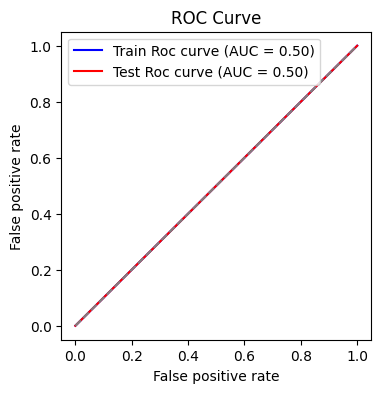

In [ ]:
# Plot ROC Curve
fpr_train,tpr_train, _=roc_curve(y_train,y_train_pred)
fpr_test,tpr_test, _=roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,4))

plt.plot(fpr_train,tpr_train, label=f'Train Roc curve (AUC = {auc_roc_train:.2f})', color='blue')
plt.plot(fpr_test,tpr_test, label=f'Test Roc curve (AUC = {auc_roc_test:.2f})', color='red')
plt.plot([0,1], [0,1], linestyle='--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_train_pred_binary))

# Classification report for the testing set
print("Classification Report for Testing Set:")
print(classification_report(y_test, y_test_pred_binary))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1758
           1       0.00      0.00      0.00       575

    accuracy                           0.75      2333
   macro avg       0.38      0.50      0.43      2333
weighted avg       0.57      0.75      0.65      2333

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       427
           1       0.00      0.00      0.00       157

    accuracy                           0.73       584
   macro avg       0.37      0.50      0.42       584
weighted avg       0.53      0.73      0.62       584



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform hyperparameter tuning on the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Accuracy: 0.7921131590227175
Test Accuracy: 0.7311643835616438
Train Precision: 1.0
Test Precision: 0.0
Train Recall: 0.1565217391304348
Test Recall: 0.0
Train F1 score: 0.27067669172932335
Test F1 score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate evaluation metrics for the best model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics for the best model
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Train Precision:", precision_train)
print("Test Precision:", precision_test)
print("Train Recall:", recall_train)
print("Test Recall:", recall_test)
print("Train F1 score:", f1_train)
print("Test F1 score:", f1_test)

Train Accuracy: 0.7921131590227175
Test Accuracy: 0.7311643835616438
Train Precision: 1.0
Test Precision: 0.0
Train Recall: 0.1565217391304348
Test Recall: 0.0
Train F1 score: 0.27067669172932335
Test F1 score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Report of model results**

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall']

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Model'] + metrics)

In [ ]:
# Sample data for illustration purposes
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression', 'Elastic Net Regression',
          'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'KNN Classifier', 'SVC']


In [ ]:

train_results = [[0.75,0,0],
                 [0.75,0,0],
                 [0.65,1,0.0012],
                 [0.75,0,0],
                 [0.75,1,0.0012],
                 [0.78,0.85,0.15],
                 [0.79,1,0.166],
                 [0.77,0.98,0.09],
                 [0.76,0.58,0.18],
                 [0.75,0,0]]

test_results = [[0.73,0,0],
                [0.73,0,0],
                [0.61,0,0],
                [0.73,0,0],
                [0.73,0,0],
                [0.72,0.45,0.05],
                [0.73,0,0],
                [0.73,0.63,0.04],
                [0.68,0.2,0.057],
                [0.73,0,0]]




In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy(Train)', 'Precision(Train)', 'Recall(Train)',
                                   'Accuracy(Test)', 'Precision(Test)', 'Recall(Test)'])

# Add results for each model
for model, train_result, test_result in zip(models, train_results, test_results):
    results_df = results_df.append({'Model': model,
                                    'Accuracy(Train)' : train_result[0],
                                    'Precision(Train)': train_result[1],
                                    'Recall(Train)': train_result[2],
                                    'Accuracy(Test)': test_result[0],
                                    'Precision(Test)': test_result[1],
                                    'Recall(Test)': test_result[2],},
                                   ignore_index=True)

# Print the results DataFrame
print("Results Table:")
print(results_df)

Results Table:
                          Model  Accuracy(Train) Precision(Train)  \
0             Linear Regression             0.75                0   
1              Lasso Regression             0.75                0   
2              Ridge Regression             0.65                1   
3           Logistic Regression             0.75                0   
4        Elastic Net Regression             0.75                1   
5      Decision Tree Classifier             0.78             0.85   
6      Random Forest Classifier             0.79                1   
7  Gradient Boosting Classifier             0.77             0.98   
8                KNN Classifier             0.76             0.58   
9                           SVC             0.75                0   

  Recall(Train)  Accuracy(Test) Precision(Test) Recall(Test)  
0             0            0.73               0            0  
1             0            0.73               0            0  
2        0.0012            0.61     

<ipython-input-185-6c9f706744ed>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model,
<ipython-input-185-6c9f706744ed>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model,
<ipython-input-185-6c9f706744ed>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model,
<ipython-input-185-6c9f706744ed>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model,
<ipython-input-185-6c9f706744ed>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

**Conclusion**


*   There are 2917 records and 16 features.
*   There are no duplicate values.

*   All the continuous variables are positively skewed except age (which is almost normally distributed)

*   Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.

*   There are more female patients compared to male patients.

*   The variables 'systolic BP'and 'diastolic BP' are highly correlated.

*   Models we implemented are 'Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression', 'Elastic Net Regression','Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'KNN Classifier', 'SVC'.

*   Models like Random Forest Classifier(79%) and Gradient Boosting Classifier(75%) exhibit relatively higher accuracy and precision scores on both the training and testing datasets.

*  High Recall means we want to detect as many people as possible who have CHD, even if we accidentally say some healthy people have CHD.
*   High Precision means we want to be very sure that the people we say have CHD actually have CHD, so we don't accidentally treat healthy people.
*   The F1 Score is a way to measure how accurate a model is in finding people having CHD while also being careful not to mistake healthy people as sick. It's like finding a balance between catching as many people having cardiovascular problems as possible and making sure we're correct about who is actually sick..


*  Models with high
    *  Recall: Random forest classifier
    *  Precision: Ridge Regression, ElasticNet Regression, Random forest classifier
    *  F1 score: Random forest classifier

